Importing libraries

In [1]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns    
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      


Importing Dataset

In [ ]:
file_path = 'Dataset.csv'
df = pd.read_csv(file_path)
print(df.head())


EDA - Expploratory Data Analysis

In [3]:
#  Basic info
print(df.dtypes)
# check for missing values
print(df.isnull().sum())
#  Get summary of the data
print(df.describe()) 

Surname                 int64
CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Surname_tfidf_0       float64
Surname_tfidf_1       float64
Surname_tfidf_2       float64
Surname_tfidf_3       float64
Surname_tfidf_4       float64
France                  int64
Germany                 int64
Spain                   int64
Female                  int64
Male                    int64
Mem__no__Products     float64
Cred_Bal_Sal          float64
Bal_sal               float64
Tenure_Age            float64
Age_Tenure_product    float64
dtype: object
Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited              

Visualization

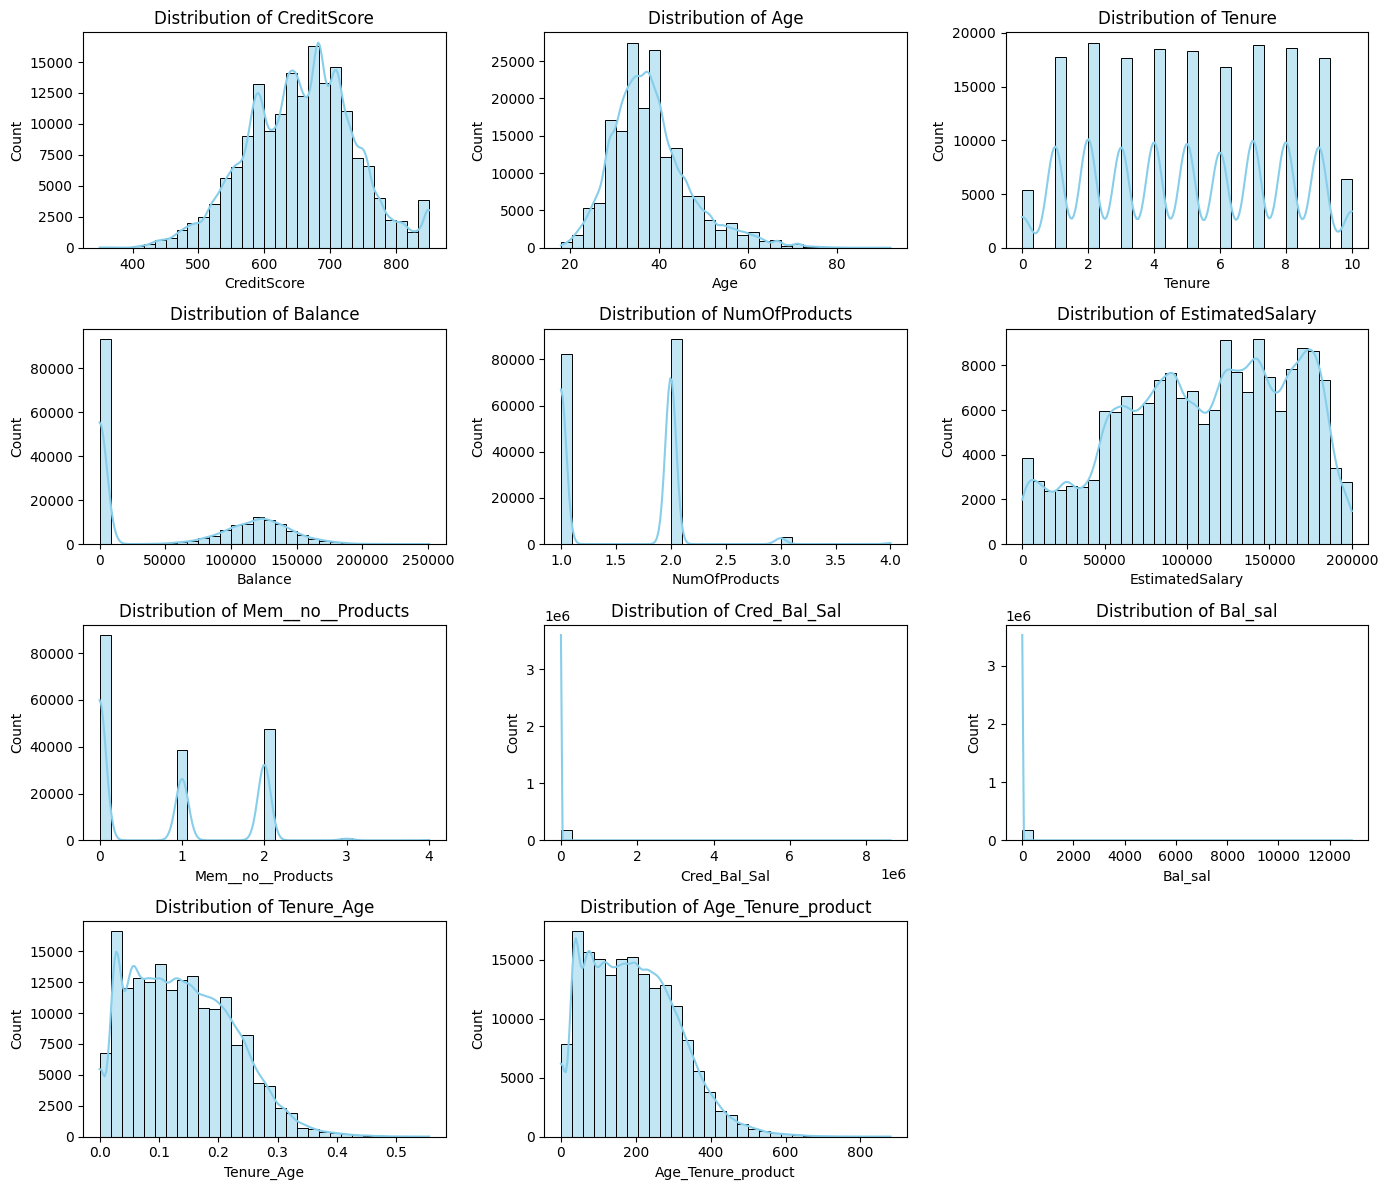

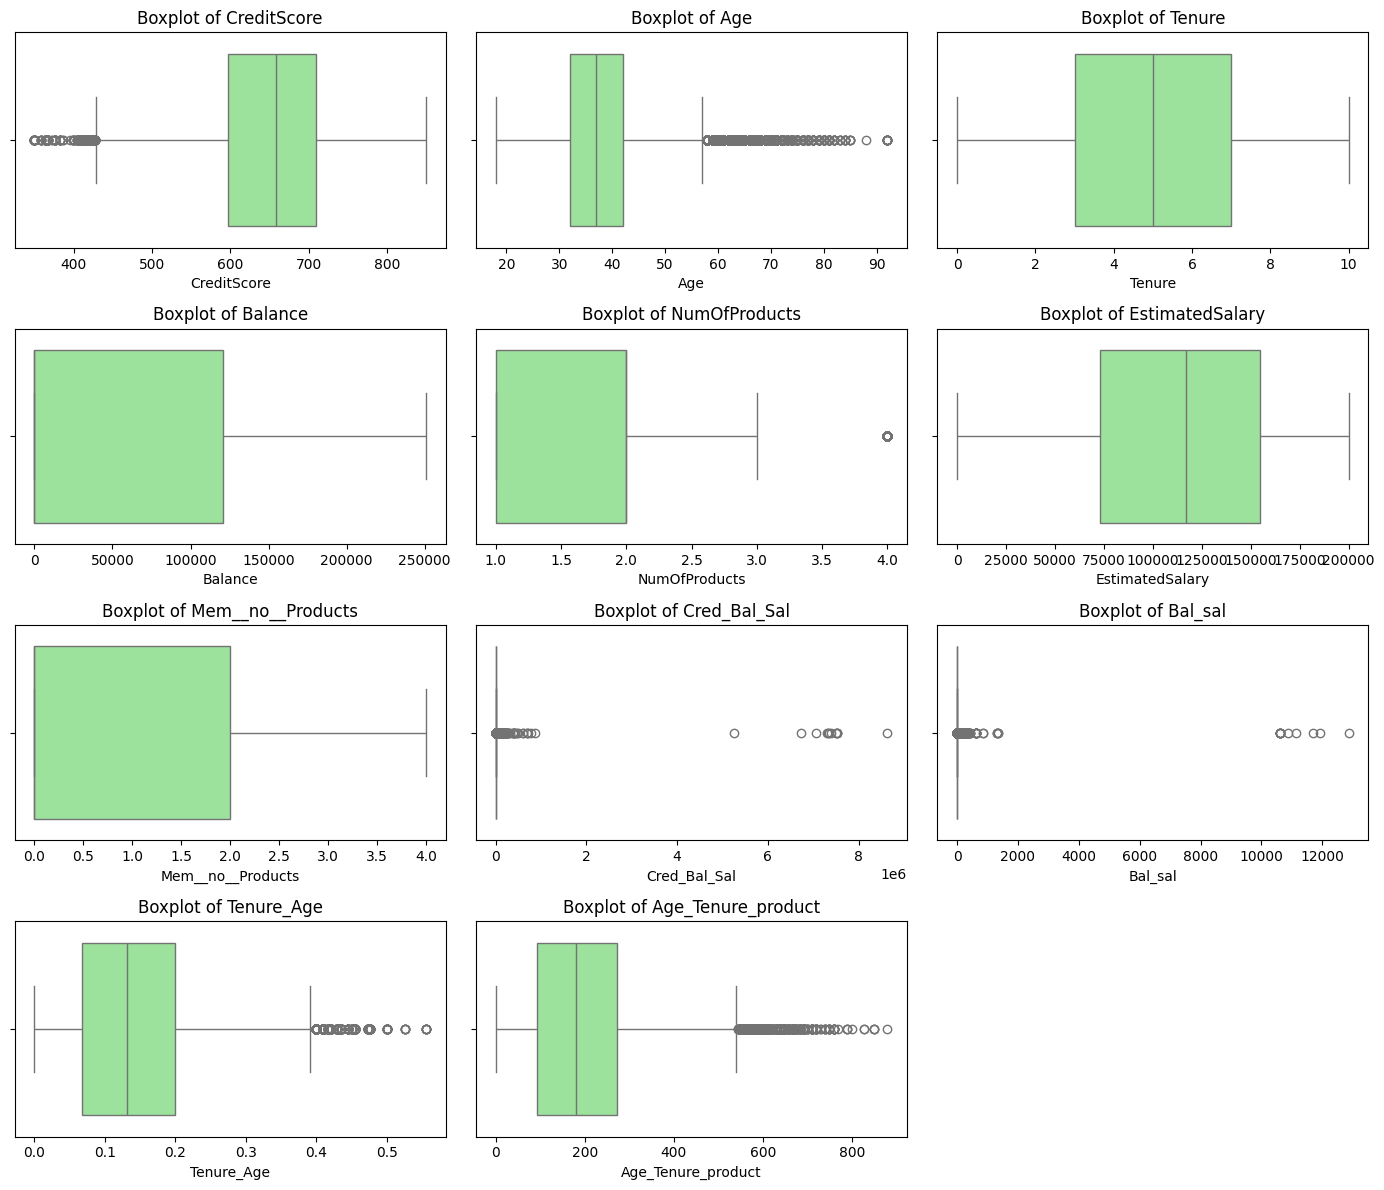

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                     'EstimatedSalary', 'Mem__no__Products', 'Cred_Bal_Sal', 
                     'Bal_sal', 'Tenure_Age', 'Age_Tenure_product']

# Plot histograms and boxplots for numerical columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots for numerical columns to identify outliers
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Feature Engineering

In [5]:
# Select numerical features to scale
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the scaled data
print(df[numerical_features].head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary
0     0.146485 -0.576544 -0.718557 -0.899885       0.813766         1.369413
1    -0.358765 -0.576544 -1.430010 -0.899885       0.813766        -1.227193
2     0.269716  0.203875  1.771530 -0.899885       0.813766         1.436651
3    -0.925630 -0.465056 -1.074283  1.463996      -1.007031        -0.537291
4     0.737996 -0.576544 -0.007103 -0.899885       0.813766        -1.904841


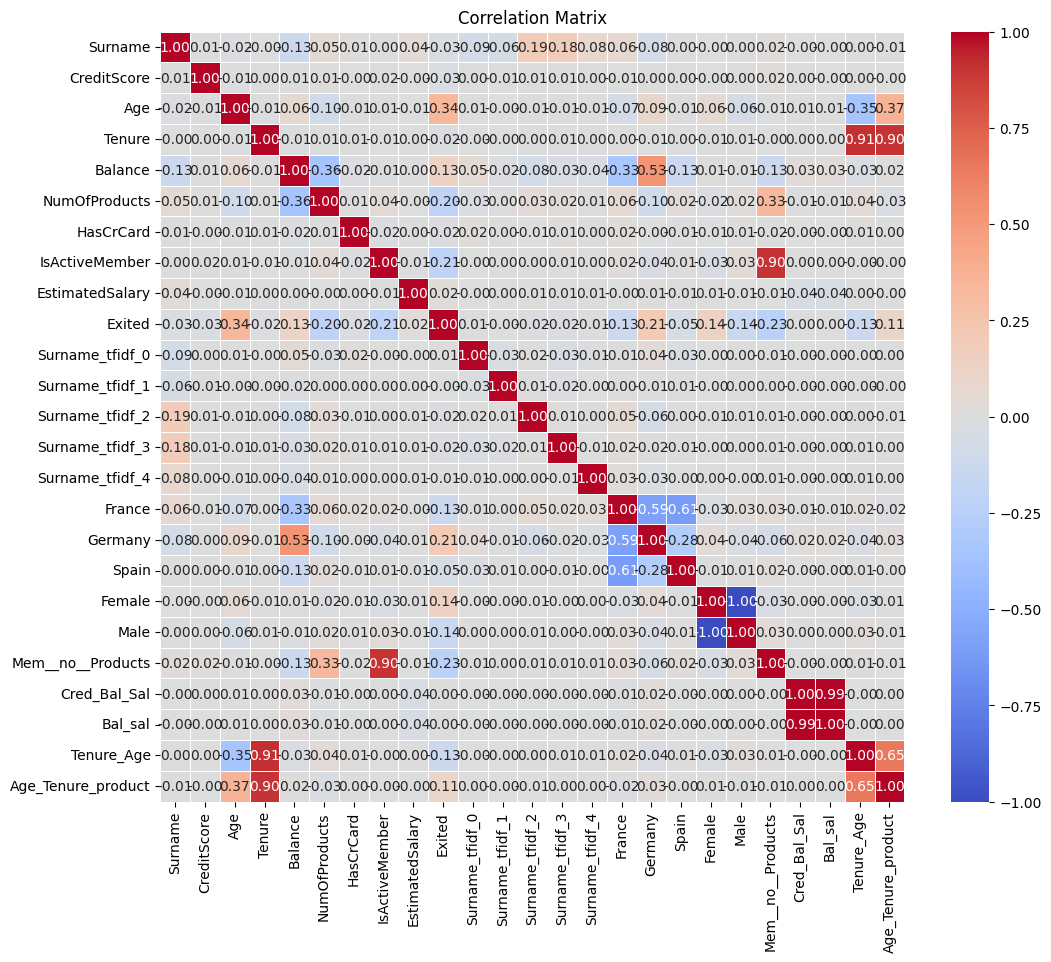

In [6]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('Exited', axis=1)  # All columns except 'Exited'
y = df['Exited']  # The target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)


(140022, 24) (35006, 24)


Logistic regression

c:\Users\Parwaaz Joshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8332


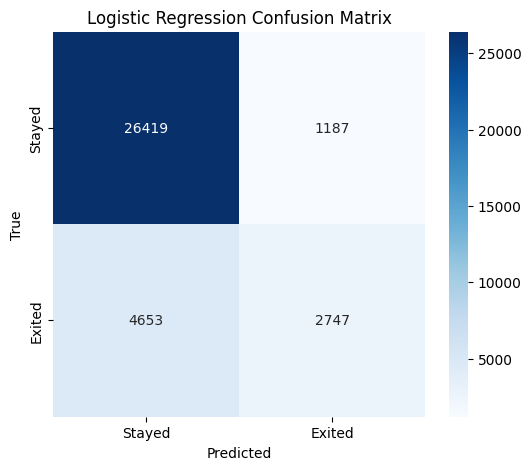

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     27606
           1       0.70      0.37      0.48      7400

    accuracy                           0.83     35006
   macro avg       0.77      0.66      0.69     35006
weighted avg       0.82      0.83      0.81     35006



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Random Forest Classifier

Random Forest Accuracy: 0.8608


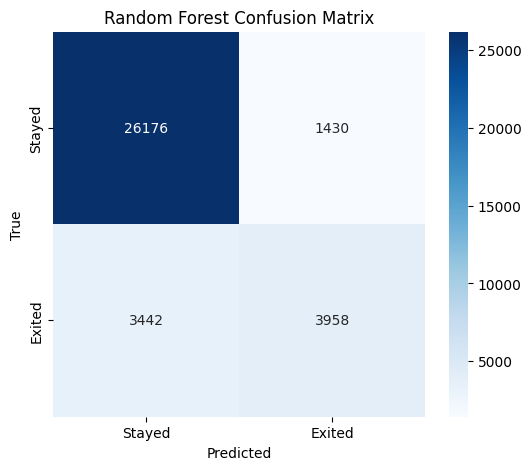

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27606
           1       0.73      0.53      0.62      7400

    accuracy                           0.86     35006
   macro avg       0.81      0.74      0.77     35006
weighted avg       0.85      0.86      0.85     35006



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


KNN - K Nearest Neighbour

KNN Accuracy: 0.7674


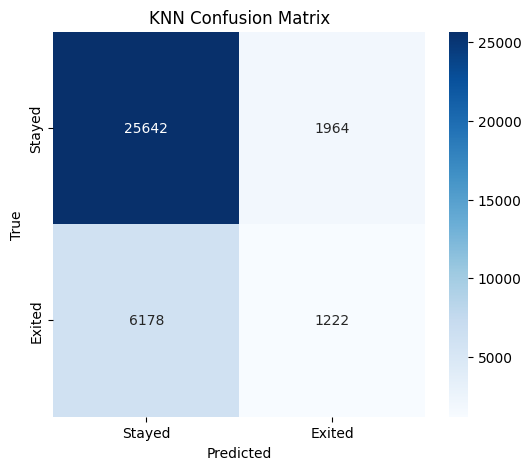

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     27606
           1       0.38      0.17      0.23      7400

    accuracy                           0.77     35006
   macro avg       0.59      0.55      0.55     35006
weighted avg       0.72      0.77      0.73     35006



In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Accuracy
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))
